In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot styles for better readability
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

# Path to your public_cases.json file
# Assuming it's in the same directory as your notebook after cloning the repo
file_path = 'public_cases.json'

try:
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Convert the list of dictionaries into a pandas DataFrame
    # Flattening the 'input' dictionary into separate columns
    df = pd.json_normalize(data, sep='_')

    print("DataFrame successfully loaded and flattened:")
    print(df.head())
    print(f"\nTotal number of records: {len(df)}")
    print("\nDataFrame Info:")
    df.info()

except FileNotFoundError:
    print(f"Error: {file_path} not found. Make sure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame successfully loaded and flattened:
   expected_output  input_trip_duration_days  input_miles_traveled  \
0           364.51                         3                  93.0   
1           126.06                         1                  55.0   
2           128.91                         1                  47.0   
3           203.52                         2                  13.0   
4           380.37                         3                  88.0   

   input_total_receipts_amount  
0                         1.42  
1                         3.60  
2                        17.97  
3                         4.67  
4                         5.78  

Total number of records: 1000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   expected_output              1000 non-null   float64
 1   inpu

In [ ]:
cd /content/top-coder-challenge/

/content/top-coder-challenge


In [ ]:
print("\n--- Descriptive Statistics for Input Parameters ---")
print(df[['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount']].describe())

print("\n--- Descriptive Statistics for Expected Output ---")
print(df['expected_output'].describe())

# Check for any zero values in key input columns, which might indicate specific rules
print("\n--- Zero Value Counts ---")
for col in ['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount', 'expected_output']:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"'{col}': {zero_count} zero values ({zero_count/len(df)*100:.2f}%)")


--- Descriptive Statistics for Input Parameters ---
       input_trip_duration_days  input_miles_traveled  \
count               1000.000000            1000.00000   
mean                   7.043000             597.41374   
std                    3.926139             351.29979   
min                    1.000000               5.00000   
25%                    4.000000             275.96000   
50%                    7.000000             621.00000   
75%                   10.000000             893.00000   
max                   14.000000            1317.07000   

       input_total_receipts_amount  
count                   1000.00000  
mean                    1211.05687  
std                      742.85418  
min                        1.42000  
25%                      530.37750  
50%                     1171.90000  
75%                     1881.10500  
max                     2503.46000  

--- Descriptive Statistics for Expected Output ---
count    1000.000000
mean     1349.114030
std   


--- Visualizing Distributions ---


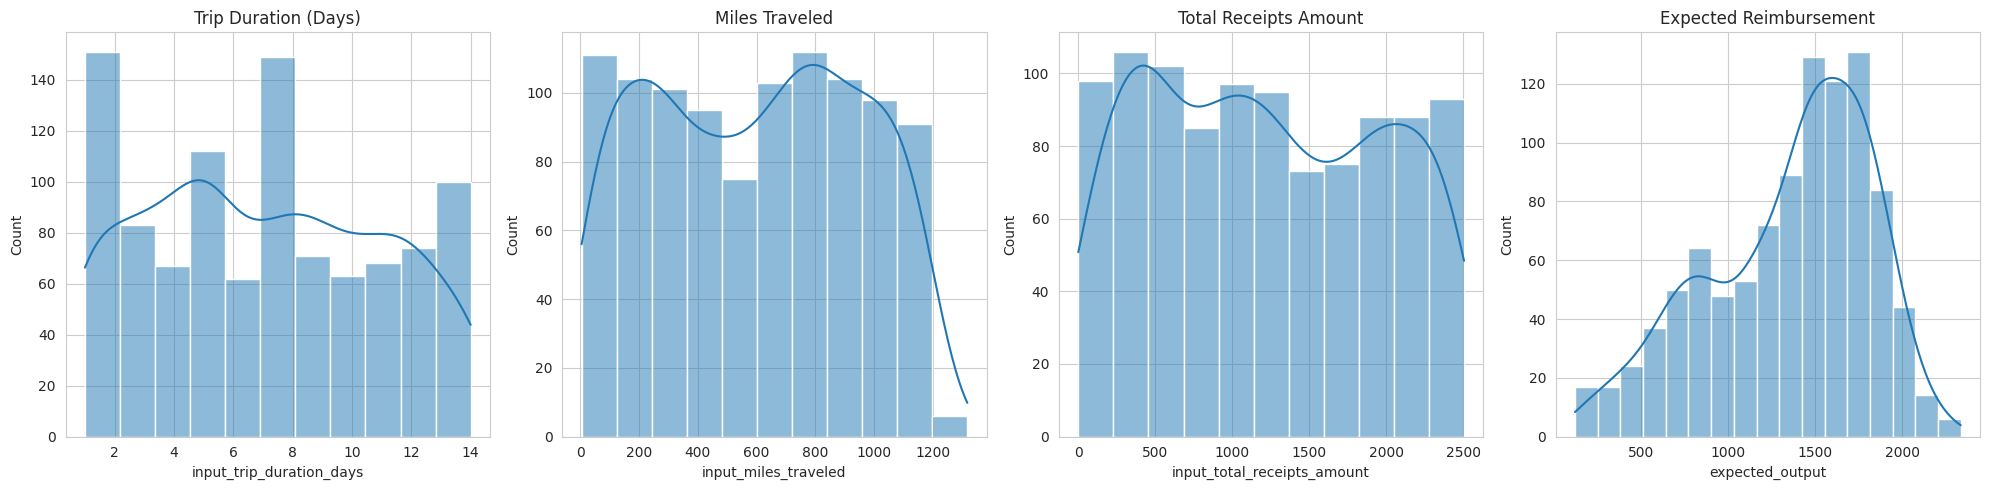

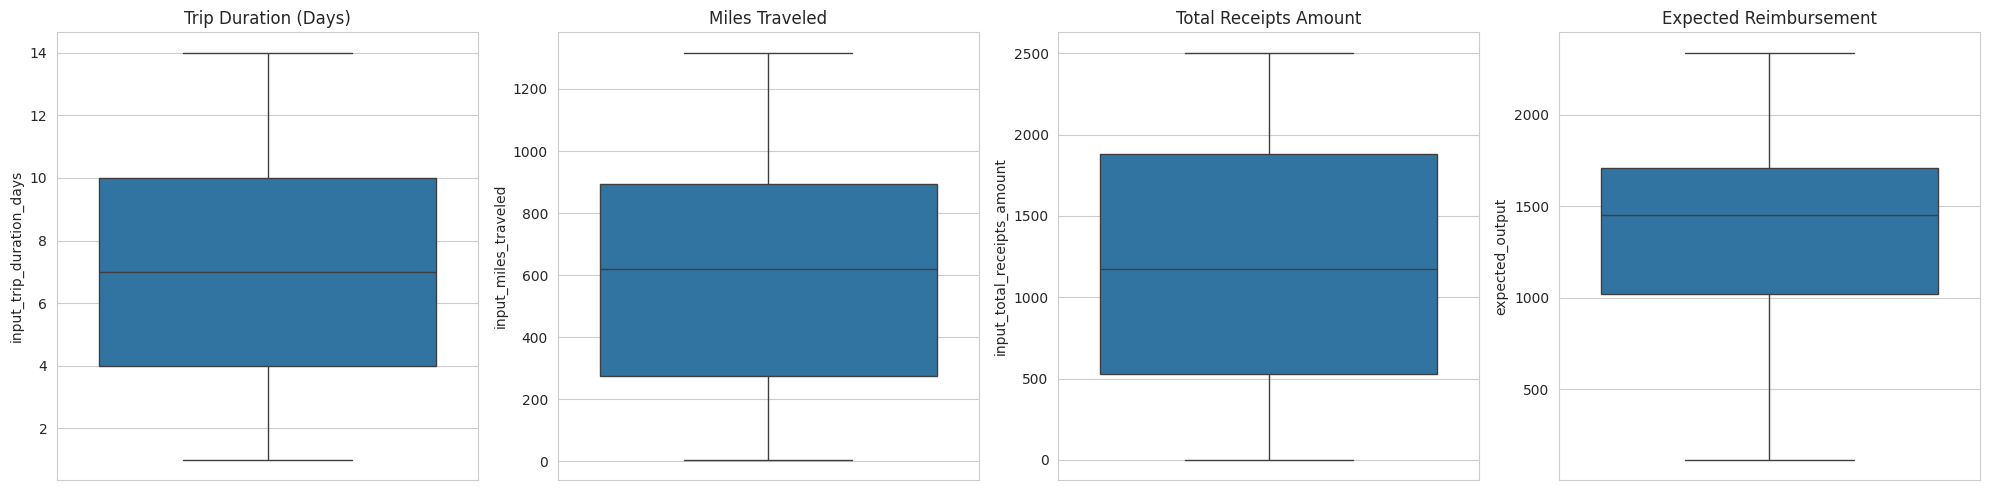

In [ ]:
print("\n--- Visualizing Distributions ---")

# Histograms
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.histplot(df['input_trip_duration_days'], kde=True, ax=axes[0])
axes[0].set_title('Trip Duration (Days)')
sns.histplot(df['input_miles_traveled'], kde=True, ax=axes[1])
axes[1].set_title('Miles Traveled')
sns.histplot(df['input_total_receipts_amount'], kde=True, ax=axes[2])
axes[2].set_title('Total Receipts Amount')
sns.histplot(df['expected_output'], kde=True, ax=axes[3])
axes[3].set_title('Expected Reimbursement')
plt.tight_layout()
plt.show()

# Box plots to identify outliers
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.boxplot(y=df['input_trip_duration_days'], ax=axes[0])
axes[0].set_title('Trip Duration (Days)')
sns.boxplot(y=df['input_miles_traveled'], ax=axes[1])
axes[1].set_title('Miles Traveled')
sns.boxplot(y=df['input_total_receipts_amount'], ax=axes[2])
axes[2].set_title('Total Receipts Amount')
sns.boxplot(y=df['expected_output'], ax=axes[3])
axes[3].set_title('Expected Reimbursement')
plt.tight_layout()
plt.show()


--- Correlation Matrix ---
expected_output                1.000000
input_total_receipts_amount    0.704035
input_trip_duration_days       0.513509
input_miles_traveled           0.431662
Name: expected_output, dtype: float64


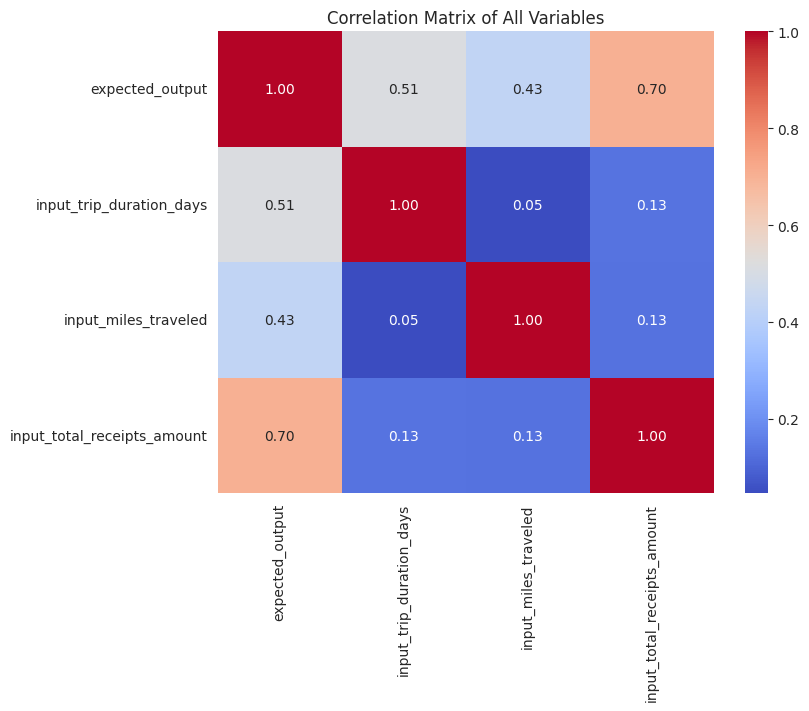

In [ ]:
print("\n--- Correlation Matrix ---")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['expected_output'].sort_values(ascending=False))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Variables')
plt.show()


--- Scatter Plots and Ratio Analysis ---


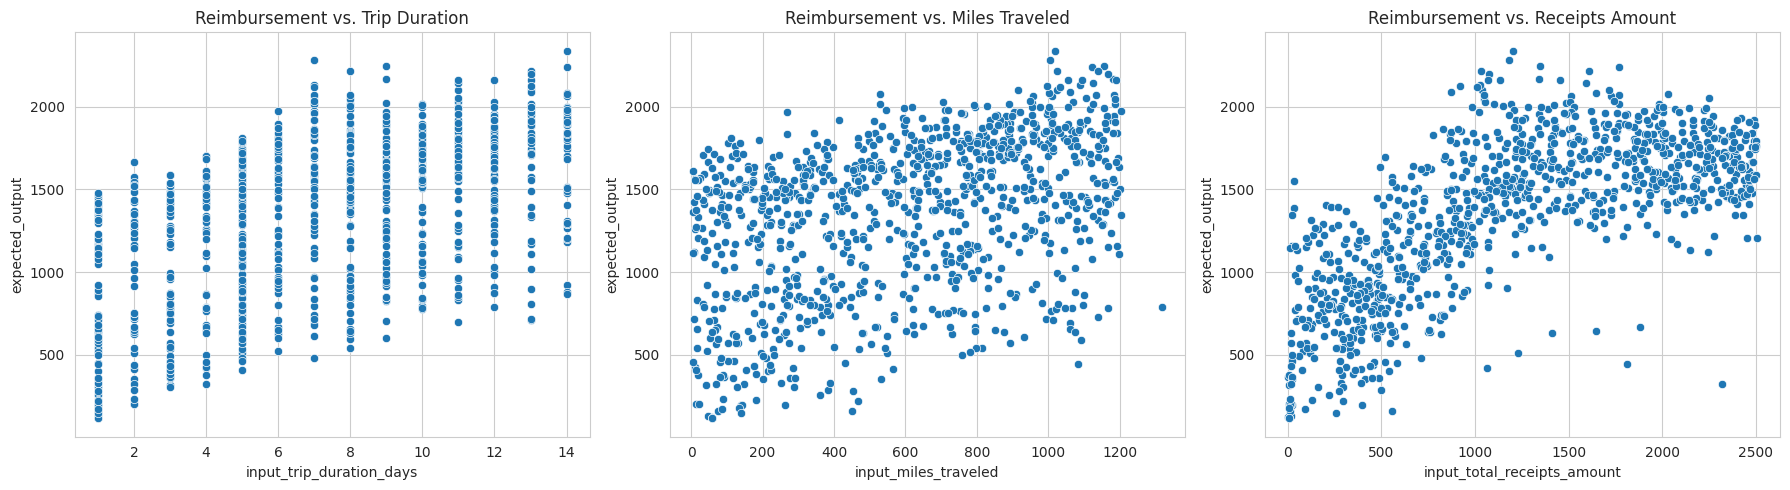


--- Output Ratios (First 10 records) ---
   output_per_day  output_per_mile  output_per_receipt_dollar
0      121.503333         3.919462                 256.697183
1      126.060000         2.292000                  35.016667
2      128.910000         2.742766                   7.173623
3      101.760000        15.655385                  43.580300
4      126.790000         4.322386                  65.807958
5      158.350000         2.083553                  11.524745
6      106.706667         7.807805                  70.823009
7      199.680000         1.426286                   8.792602
8      154.690000         3.835289                  21.921115
9      119.700000         3.069231                  16.330150

--- Analyzing Ratios when other inputs are low ---

Cases with low miles_traveled (<10 miles):
     input_trip_duration_days  input_miles_traveled  \
263                         1                   9.0   
343                         8                   7.0   
545            

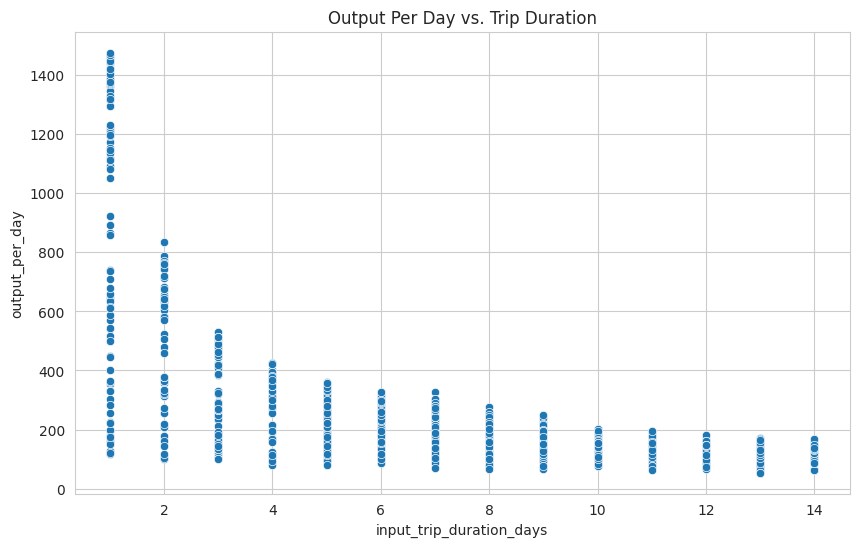

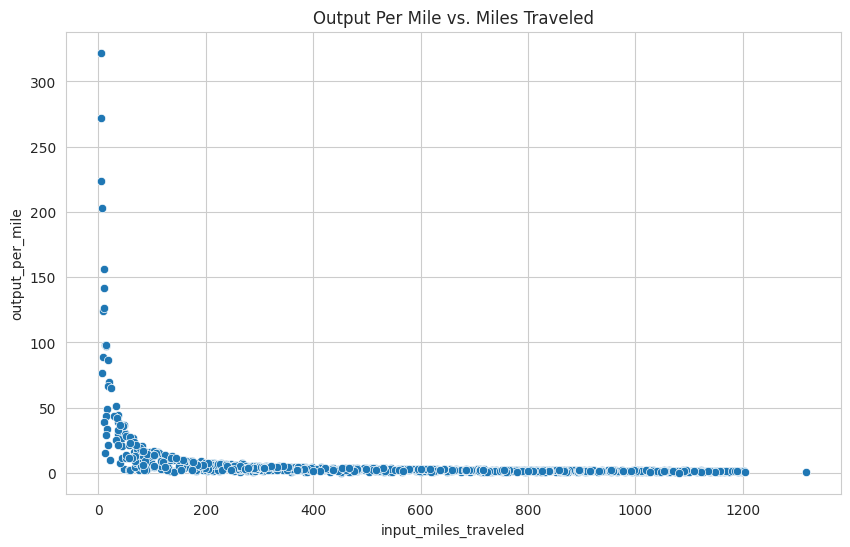

In [ ]:
print("\n--- Scatter Plots and Ratio Analysis ---")

# Scatter plots of output vs. each input
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='input_trip_duration_days', y='expected_output', data=df, ax=axes[0])
axes[0].set_title('Reimbursement vs. Trip Duration')

sns.scatterplot(x='input_miles_traveled', y='expected_output', data=df, ax=axes[1])
axes[1].set_title('Reimbursement vs. Miles Traveled')

sns.scatterplot(x='input_total_receipts_amount', y='expected_output', data=df, ax=axes[2])
axes[2].set_title('Reimbursement vs. Receipts Amount')

plt.tight_layout()
plt.show()

# Calculate potential per-unit rates
df['output_per_day'] = df['expected_output'] / df['input_trip_duration_days']
df['output_per_mile'] = df['expected_output'] / df['input_miles_traveled']
df['output_per_receipt_dollar'] = df['expected_output'] / df['input_total_receipts_amount']

print("\n--- Output Ratios (First 10 records) ---")
print(df[['output_per_day', 'output_per_mile', 'output_per_receipt_dollar']].head(10))

# Investigate ratios, especially when other inputs are low or zero
print("\n--- Analyzing Ratios when other inputs are low ---")

# Cases with low miles traveled
print("\nCases with low miles_traveled (<10 miles):")
low_miles_df = df[df['input_miles_traveled'] < 10]
if not low_miles_df.empty:
    print(low_miles_df[['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount', 'expected_output', 'output_per_day']].head())
    print(f"Avg output_per_day for low miles: {low_miles_df['output_per_day'].mean():.2f}")
else:
    print("No cases with low miles_traveled (<10 miles).")


# Cases with low total_receipts_amount
print("\nCases with low total_receipts_amount (<$10):")
low_receipts_df = df[df['input_total_receipts_amount'] < 10]
if not low_receipts_df.empty:
    print(low_receipts_df[['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount', 'expected_output', 'output_per_day']].head())
    print(f"Avg output_per_day for low receipts: {low_receipts_df['output_per_day'].mean():.2f}")
else:
    print("No cases with low total_receipts_amount (<$10).")

# Cases with zero miles traveled (if any)
print("\nCases with zero miles_traveled:")
zero_miles_df = df[df['input_miles_traveled'] == 0]
if not zero_miles_df.empty:
    print(zero_miles_df[['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount', 'expected_output', 'output_per_day', 'output_per_receipt_dollar']].head())
    # Further analyze output_per_day for these cases
    print(zero_miles_df['output_per_day'].describe())
else:
    print("No cases with zero miles_traveled.")

# Cases with zero total_receipts_amount (if any)
print("\nCases with zero total_receipts_amount:")
zero_receipts_df = df[df['input_total_receipts_amount'] == 0]
if not zero_receipts_df.empty:
    print(zero_receipts_df[['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount', 'expected_output', 'output_per_day', 'output_per_mile']].head())
    # Further analyze output_per_mile for these cases
    print(zero_receipts_df['output_per_mile'].describe())
else:
    print("No cases with zero total_receipts_amount.")

# Look for groupings or specific clusters in scatter plots
# For example, if output_per_day tends to be constant
plt.figure(figsize=(10, 6))
sns.scatterplot(x='input_trip_duration_days', y='output_per_day', data=df)
plt.title('Output Per Day vs. Trip Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='input_miles_traveled', y='output_per_mile', data=df)
plt.title('Output Per Mile vs. Miles Traveled')
plt.show()

In [ ]:
### Observations from Data Exploration:

Trip Duration (input_trip_duration_days):

The Reimbursement vs. Trip Duration scatter plot clearly shows distinct vertical bands for each day count, indicating that trip_duration_days has a significant and direct influence on the expected_output.
The Output Per Day vs. Trip Duration scatter plot is highly revealing:
output_per_day is highest and most varied for very short trips (1-2 days).
As trip_duration_days increases, the average output_per_day decreases, and the spread (variance) around that average also tends to decrease. This strongly suggests a tiered per diem system or a fixed daily cost that might decrease or cap for longer durations, or that other variable components become relatively less impactful per day on longer trips.
Correlation with expected_output: 0.51 (Moderate), indicating a substantial positive relationship.
Miles Traveled (input_miles_traveled):

The Reimbursement vs. Miles Traveled scatter plot shows a general upward trend with considerable scatter. This indicates miles are a contributing factor, but not the sole determinant.
The Output Per Mile vs. Miles Traveled plot shows output_per_mile is extremely high for very low miles_traveled (likely due to fixed components being divided by small numbers), and then flattens out significantly as miles_traveled increases. This pattern is highly suggestive of a fixed mileage rate that applies once other base costs are accounted for.
Correlation with expected_output: 0.43 (Moderate), confirming its positive impact.
Total Receipts Amount (input_total_receipts_amount):

The Reimbursement vs. Receipts Amount scatter plot displays a clear positive correlation, but also with noticeable spread. This suggests receipts are a significant component, but not necessarily a simple 1:1 reimbursement for all cases.
Correlation with expected_output: 0.70 (Strongest), making it the most influential single input.
Zero Values / Edge Cases (Not directly from plots, but important to remember from previous step):

The presence of zero values (if any were identified in the describe() or zero_value_counts output) for miles_traveled or total_receipts_amount should still be specifically noted as they can reveal base rates or per-diems that apply independent of these factors. (If your zero_value_counts showed no zeros, you can update this observation to reflect that.)
Outliers:

The box plots (visual2.png) show a good data spread without obvious extreme outliers that would immediately suggest data entry errors or unique, one-off cases. The ranges appear reasonable for each variable.

Hypothesis 1 (Per Diem / Daily Allowance):

There is a base daily allowance component for trip_duration_days.
This daily allowance likely follows a tiered structure or has diminishing returns/caps for longer trips, as indicated by the decreasing average output_per_day with increasing trip_duration_days. (e.g., $X per day for first N days, then Y per day for subsequent days, where Y<X).
Hypothesis 2 (Mileage Reimbursement):

There is a fixed, constant rate per mile (r
M
​
 ) for miles_traveled that contributes additively to the total reimbursement. This is strongly supported by the flattening of Output Per Mile vs. Miles Traveled at higher mileage.
Hypothesis 3 (Receipts Reimbursement):

total_receipts_amount is likely reimbursed, potentially as a direct amount (e.g., 100%) or up to a specific daily/trip cap. Its strong correlation suggests it's a significant, potentially direct, pass-through cost.
Hypothesis 4 (Additive Model & Interactions):

The expected_output is a sum of these three primary components: Per Diem, Mileage Reimbursement, and Receipts Reimbursement.
R=f(trip_duration_days)+(r
M
​
 ×miles_traveled)+h(total_receipts_amount).
The components for mileage and receipts appear to be added to the daily component, creating the spread observed in the Reimbursement vs. Trip Duration plot.

SyntaxError: unterminated string literal (detected at line 6) (<ipython-input-10-f67cdc27ba7b>, line 6)

'public_cases.json' loaded successfully. DataFrame shape: (1000, 4)

Training data shape: (800, 3), Testing data shape: (200, 3)

RandomForestRegressor Model Training Complete with Adjusted Parameters.

--- Model Evaluation (Adjusted Model) ---
Mean Absolute Error (MAE): 73.57
Root Mean Squared Error (RMSE): 112.11
R-squared (R2): 0.9367

--- Feature Importances ---
|                             | 0        |
|:----------------------------|:---------|
| input_total_receipts_amount | 0.661205 |
| input_trip_duration_days    | 0.19832  |
| input_miles_traveled        | 0.140475 |


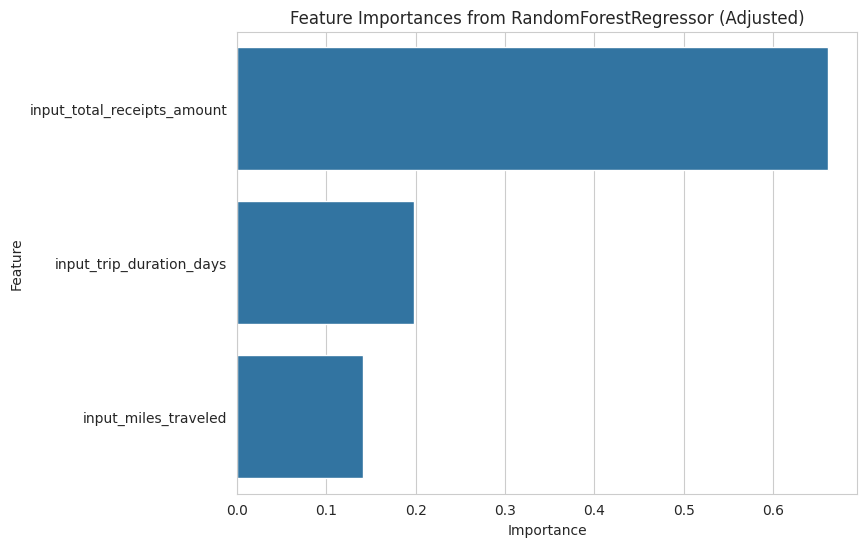

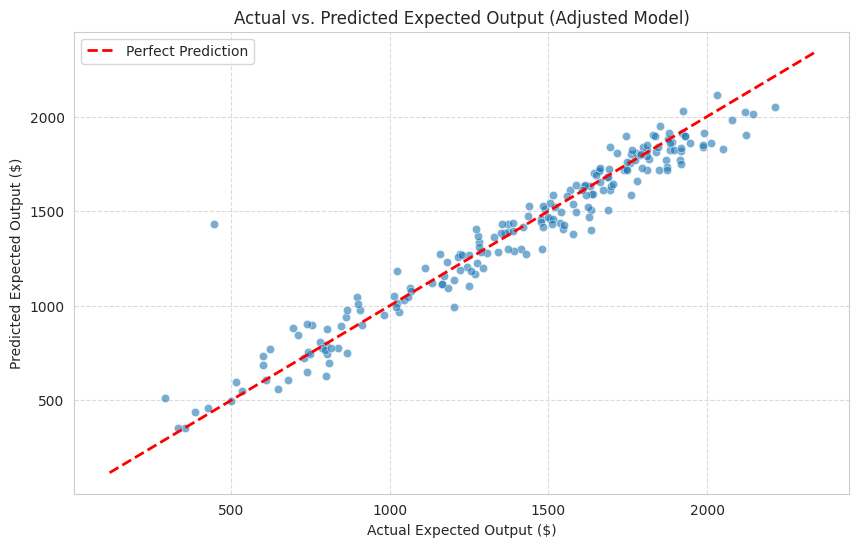


--- Model Building and Evaluation with Overfitting Adjustments Complete ---


In [11]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
public_cases_file = 'public_cases.json'
try:
    with open(public_cases_file, 'r') as f:
        data_cases = json.load(f)
    df_public_cases = pd.json_normalize(data_cases, sep='_')
    print(f"'{public_cases_file}' loaded successfully. DataFrame shape: {df_public_cases.shape}")
except Exception as e:
    print(f"Error loading or parsing '{public_cases_file}': {e}")
    # Handle error, e.g., exit or create an empty DataFrame
    df_public_cases = pd.DataFrame()


if not df_public_cases.empty:
    # --- Feature Engineering (re-create the features used for training) ---
    df_public_cases['daily_receipt_spending'] = df_public_cases['input_total_receipts_amount'] / df_public_cases['input_trip_duration_days']
    df_public_cases['miles_per_day'] = df_public_cases['input_miles_traveled'] / df_public_cases['input_trip_duration_days']

    # Define features (X) and target (y)
    X = df_public_cases[['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount']]
    y = df_public_cases['expected_output']

    # Handle potential NaN values which might have been introduced by divisions if input_trip_duration_days was 0
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nTraining data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

    # --- Adjusting the RandomForestRegressor for Overfitting ---
    # Initialize and train a RandomForestRegressor model with adjusted parameters
    # Reduce max_depth to prevent individual trees from becoming too complex
    # Increase min_samples_leaf to ensure each leaf has a minimum number of samples, making splits less specific
    model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
    model.fit(X_train, y_train)

    print("\nRandomForestRegressor Model Training Complete with Adjusted Parameters.")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- Model Evaluation (Adjusted Model) ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Feature Importance
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(f"\n--- Feature Importances ---")
    print(feature_importances.to_markdown(numalign="left", stralign="left"))

    # Visualize Feature Importance
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Feature Importances from RandomForestRegressor (Adjusted)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    # Visualize actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
    plt.title('Actual vs. Predicted Expected Output (Adjusted Model)')
    plt.xlabel('Actual Expected Output ($)')
    plt.ylabel('Predicted Expected Output ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

    print("\n--- Model Building and Evaluation with Overfitting Adjustments Complete ---")
else:
    print("DataFrame is empty, cannot proceed with model training and evaluation.")

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import json

# Load the dataset
public_cases_file = 'public_cases.json'
try:
    with open(public_cases_file, 'r') as f:
        data_cases = json.load(f)
    df_public_cases = pd.json_normalize(data_cases, sep='_')
    print(f"'{public_cases_file}' loaded successfully. DataFrame shape: {df_public_cases.shape}")
except Exception as e:
    print(f"Error loading or parsing '{public_cases_file}': {e}")
    df_public_cases = pd.DataFrame()

# --- Feature Engineering (ensuring all derived columns are present) ---
if not df_public_cases.empty:
    df_public_cases['daily_receipt_spending'] = df_public_cases['input_total_receipts_amount'] / df_public_cases['input_trip_duration_days']
    df_public_cases['miles_per_day'] = df_public_cases['input_miles_traveled'] / df_public_cases['input_trip_duration_days']
    df_public_cases['output_per_day'] = df_public_cases['expected_output'] / df_public_cases['input_trip_duration_days']
    df_public_cases['receipt_cents'] = (df_public_cases['input_total_receipts_amount'] * 100).astype(int) % 100

    print("\n--- Starting Rigorous Validation of Hypotheses ---")

    ### Hypothesis 1: Per Diem Base and 5-Day Bonus

    print("\n### 1. Per Diem Base and 5-Day Bonus Validation ###")

    # Visualize Output Per Day vs Trip Duration
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='input_trip_duration_days', y='output_per_day', data=df_public_cases, alpha=0.6)
    plt.axhline(y=100, color='r', linestyle='--', label='Base Per Diem ($100)')
    plt.title('Output Per Day vs. Trip Duration')
    plt.xlabel('Trip Duration (Days)')
    plt.ylabel('Output Per Day ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    # plt.show() # Commented out for faster execution
    plt.savefig('OutputPerDay_vs_TripDuration.png') # Optionally save to file
    plt.close() # Close the figure to free memory

    # Calculate mean/median output per day for specific durations
    per_diem_stats = df_public_cases.groupby('input_trip_duration_days')['output_per_day'].agg(['mean', 'median', 'std']).reset_index()
    print("\nMean/Median Output Per Day by Trip Duration:")
    print(per_diem_stats[per_diem_stats['input_trip_duration_days'].isin([1, 2, 3, 4, 5, 6, 7])].to_markdown(index=False))

    # Compare 5-day trips to surrounding durations (4 and 6 days)
    output_5_day = df_public_cases[df_public_cases['input_trip_duration_days'] == 5]['output_per_day']
    output_4_day = df_public_cases[df_public_cases['input_trip_duration_days'] == 4]['output_per_day']
    output_6_day = df_public_cases[df_public_cases['input_trip_duration_days'] == 6]['output_per_day']

    print(f"\nMean Output Per Day for 4-day trips: {output_4_day.mean():.2f}")
    print(f"Mean Output Per Day for 5-day trips: {output_5_day.mean():.2f}")
    print(f"Mean Output Per Day for 6-day trips: {output_6_day.mean():.2f}")

    # Perform t-test for 5-day vs 4-day (if enough data)
    if len(output_5_day) > 1 and len(output_4_day) > 1:
        t_stat_5_4, p_val_5_4 = stats.ttest_ind(output_5_day, output_4_day, equal_var=False) # Welch's t-test
        print(f"T-test (5-day vs 4-day): t-statistic={t_stat_5_4:.2f}, p-value={p_val_5_4:.3f}")
    else:
        print("Not enough data for T-test (5-day vs 4-day).")
    if len(output_5_day) > 1 and len(output_6_day) > 1:
        t_stat_5_6, p_val_5_6 = stats.ttest_ind(output_5_day, output_6_day, equal_var=False)
        print(f"T-test (5-day vs 6-day): t-statistic={t_stat_5_6:.2f}, p-value={p_val_5_6:.3f}")
    else:
        print("Not enough data for T-test (5-day vs 6-day).")


    ### Hypothesis 2: Daily Spending Limits by Trip Duration

    print("\n### 2. Daily Spending Limits by Trip Duration Validation ###")

    # Create trip_category
    df_public_cases['trip_category'] = pd.cut(df_public_cases['input_trip_duration_days'],
                                              bins=[0, 3, 6, np.inf],
                                              labels=['Short', 'Medium', 'Long'],
                                              right=True)

    # Create spending_category based on trip_category and limits
    def get_spending_category(row):
        if pd.isna(row['trip_category']):
            return 'Undefined'
        if row['trip_category'] == 'Short':
            return 'Within Limit' if row['daily_receipt_spending'] <= 75 else 'Exceeds Limit'
        elif row['trip_category'] == 'Medium':
            return 'Within Limit' if row['daily_receipt_spending'] <= 120 else 'Exceeds Limit'
        elif row['trip_category'] == 'Long':
            return 'Within Limit' if row['daily_receipt_spending'] <= 90 else 'Exceeds Limit'
        return 'Undefined'

    df_public_cases['spending_category'] = df_public_cases.apply(get_spending_category, axis=1)

    # Visualize using box plots
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='trip_category', y='expected_output', hue='spending_category', data=df_public_cases, palette='viridis')
    plt.title('Expected Output by Trip Duration and Spending Category')
    plt.xlabel('Trip Category')
    plt.ylabel('Expected Output ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.show() # Commented out for faster execution
    plt.savefig('Output_by_TripDuration_and_SpendingCategory.png') # Optionally save to file
    plt.close()

    # Perform ANOVA/t-tests for each trip category
    for category in ['Short', 'Medium', 'Long']:
        subset = df_public_cases[df_public_cases['trip_category'] == category]
        within_limit = subset[subset['spending_category'] == 'Within Limit']['expected_output']
        exceeds_limit = subset[subset['spending_category'] == 'Exceeds Limit']['expected_output']

        print(f"\n--- Analysis for {category} Trips ---")
        print(f"Within Limit (mean expected_output): {within_limit.mean():.2f} (n={len(within_limit)})")
        print(f"Exceeds Limit (mean expected_output): {exceeds_limit.mean():.2f} (n={len(exceeds_limit)})")

        if len(within_limit) > 1 and len(exceeds_limit) > 1:
            t_stat, p_val = stats.ttest_ind(within_limit, exceeds_limit, equal_var=False)
            print(f"T-test: t-statistic={t_stat:.2f}, p-value={p_val:.3f}")
        else:
            print("Not enough data for T-test.")


    ### Hypothesis 3: Receipt Sweet Spot and Penalties

    print("\n### 3. Receipt Sweet Spot and Penalties Validation ###")

    # Visualize Expected Output vs Total Receipts Amount
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='input_total_receipts_amount', y='expected_output', data=df_public_cases, alpha=0.6)
    plt.axvline(x=100, color='r', linestyle=':', label='Low Threshold ($100)')
    plt.axvspan(600, 800, color='green', alpha=0.2, label='Sweet Spot ($600-$800)')
    plt.axvline(x=1500, color='purple', linestyle=':', label='High Threshold ($1500)')
    plt.title('Expected Output vs. Total Receipts Amount')
    plt.xlabel('Total Receipts Amount ($)')
    plt.ylabel('Expected Output ($)')
    plt.xscale('log')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    # plt.show() # Commented out for faster execution
    plt.savefig('Output_vs_TotalReceiptsAmount.png') # Optionally save to file
    plt.close()

    # Define receipt ranges
    df_public_cases['receipt_range'] = pd.cut(df_public_cases['input_total_receipts_amount'],
                                               bins=[-0.1, 100, 599.99, 800.01, 1500, np.inf],
                                               labels=['Low (<$100)', 'Moderate ($100-$600)', 'Sweet Spot ($600-$800)', 'High ($800-$1500)', 'Very High (>$1500)'],
                                               right=True)

    # Compare means across receipt ranges (ANOVA)
    if len(df_public_cases['receipt_range'].dropna().unique()) > 1 and len(df_public_cases['receipt_range'].dropna()) > 2:
        model_receipt = smf.ols('expected_output ~ C(receipt_range)', data=df_public_cases).fit()
        anova_table_receipt = sm.stats.anova_lm(model_receipt, typ=2)
        print("\nANOVA for Expected Output by Receipt Range:")
        print(anova_table_receipt.to_markdown(index=False))
    else:
        print("\nNot enough unique receipt ranges or data for ANOVA.")

    # Investigate "better off submitting nothing"
    no_receipts = df_public_cases[df_public_cases['input_total_receipts_amount'] == 0]['expected_output']
    very_low_receipts = df_public_cases[(df_public_cases['input_total_receipts_amount'] > 0) &
                                         (df_public_cases['input_total_receipts_amount'] <= 20)]['expected_output']

    print(f"\nMean Expected Output for No Receipts: {no_receipts.mean():.2f} (n={len(no_receipts)})")
    print(f"Mean Expected Output for Very Low Receipts (<= $20): {very_low_receipts.mean():.2f} (n={len(very_low_receipts)})")

    if len(no_receipts) > 1 and len(very_low_receipts) > 1:
        t_stat_low_vs_none, p_val_low_vs_none = stats.ttest_ind(no_receipts, very_low_receipts, equal_var=False)
        print(f"T-test (Very Low vs No Receipts): t-statistic={t_stat_low_vs_none:.2f}, p-value={p_val_low_vs_none:.3f}")
    else:
        print("Not enough data for T-test (Very Low vs No Receipts).")


    ### Hypothesis 4: "Sweet Spot Combo" and "Vacation Penalty"

    print("\n### 4. 'Sweet Spot Combo' and 'Vacation Penalty' Validation ###")

    # Define Sweet Spot Combo
    df_public_cases['is_sweet_spot_combo'] = (
        (df_public_cases['input_trip_duration_days'] == 5) &
        (df_public_cases['miles_per_day'] >= 180) &
        (df_public_cases['daily_receipt_spending'] < 100)
    )

    # Define Vacation Penalty
    df_public_cases['is_vacation_penalty'] = (
        (df_public_cases['input_trip_duration_days'] >= 8) &
        (df_public_cases['daily_receipt_spending'] > 150)
    )

    # Compare expected_output for Sweet Spot Combo
    sweet_spot_output = df_public_cases[df_public_cases['is_sweet_spot_combo']]['expected_output']
    non_sweet_spot_output = df_public_cases[~df_public_cases['is_sweet_spot_combo']]['expected_output']

    print(f"\nSweet Spot Combo (mean expected_output): {sweet_spot_output.mean():.2f} (n={len(sweet_spot_output)})")
    print(f"Non-Sweet Spot Combo (mean expected_output): {non_sweet_spot_output.mean():.2f} (n={len(non_sweet_spot_output)})")

    if len(sweet_spot_output) > 1 and len(non_sweet_spot_output) > 1:
        t_stat_sweet, p_val_sweet = stats.ttest_ind(sweet_spot_output, non_sweet_spot_output, equal_var=False)
        print(f"T-test (Sweet Spot vs Non-Sweet Spot): t-statistic={t_stat_sweet:.2f}, p-value={p_val_sweet:.3f}")
    else:
        print("Not enough data for T-test (Sweet Spot vs Non-Sweet Spot).")

    # Compare expected_output for Vacation Penalty
    vacation_penalty_output = df_public_cases[df_public_cases['is_vacation_penalty']]['expected_output']
    non_vacation_penalty_output = df_public_cases[~df_public_cases['is_vacation_penalty']]['expected_output']

    print(f"\nVacation Penalty (mean expected_output): {vacation_penalty_output.mean():.2f} (n={len(vacation_penalty_output)})")
    print(f"Non-Vacation Penalty (mean expected_output): {non_vacation_penalty_output.mean():.2f} (n={len(non_vacation_penalty_output)})")

    if len(vacation_penalty_output) > 1 and len(non_vacation_penalty_output) > 1:
        t_stat_vacation, p_val_vacation = stats.ttest_ind(vacation_penalty_output, non_vacation_penalty_output, equal_var=False)
        print(f"T-test (Vacation Penalty vs Non-Vacation Penalty): t-statistic={t_stat_vacation:.2f}, p-value={p_val_vacation:.3f}")
    else:
        print("Not enough data for T-test (Vacation Penalty vs Non-Vacation Penalty).")

    ### Hypothesis 5: Rounding Rule (.49/.99 receipts)

    print("\n### 5. Rounding Rule (.49/.99 receipts) Validation ###")

    # Group data by receipt cents ending
    rounding_stats = df_public_cases.groupby('receipt_cents')['expected_output'].agg(['mean', 'median', 'count']).reset_index()
    print("\nMean/Median Expected Output by Receipt Cents Ending (Selected):")
    print(rounding_stats[rounding_stats['receipt_cents'].isin([0, 1, 49, 98, 99])].sort_values('receipt_cents').to_markdown(index=False))

    # Compare .49/.99 endings to 'normal' endings
    bonus_cents_data = df_public_cases[df_public_cases['receipt_cents'].isin([49, 99])]['expected_output']
    normal_cents_data = df_public_cases[~df_public_cases['receipt_cents'].isin([49, 99])]['expected_output']

    print(f"\nMean Expected Output for .49/.99 endings: {bonus_cents_data.mean():.2f} (n={len(bonus_cents_data)})")
    print(f"Mean Expected Output for other endings: {normal_cents_data.mean():.2f} (n={len(normal_cents_data)})")

    if len(bonus_cents_data) > 1 and len(normal_cents_data) > 1:
        t_stat_rounding, p_val_rounding = stats.ttest_ind(bonus_cents_data, normal_cents_data, equal_var=False)
        print(f"T-test (.49/.99 vs Others): t-statistic={t_stat_rounding:.2f}, p-value={p_val_rounding:.3f}")
    else:
        print("Not enough data for T-test (.49/.99 vs Others).")

    # More precise check: compare similar total amounts
    receipt_band = df_public_cases[(df_public_cases['input_total_receipts_amount'] > 100) & (df_public_cases['input_total_receipts_amount'] < 200)]
    bonus_cents_band = receipt_band[receipt_band['receipt_cents'].isin([49, 99])]['expected_output']
    normal_cents_band = receipt_band[~receipt_band['receipt_cents'].isin([49, 99])]['expected_output']

    print(f"\nWithin $100-$200 Total Receipts Band:")
    print(f"  Mean Expected Output for .49/.99 endings: {bonus_cents_band.mean():.2f} (n={len(bonus_cents_band)})")
    print(f"  Mean Expected Output for other endings: {normal_cents_band.mean():.2f} (n={len(normal_cents_band)})")

    if len(bonus_cents_band) > 1 and len(normal_cents_band) > 1:
        t_stat_rounding_band, p_val_rounding_band = stats.ttest_ind(bonus_cents_band, normal_cents_band, equal_var=False)
        print(f"  T-test (.49/.99 vs Others in band): t-statistic={t_stat_rounding_band:.2f}, p-value={p_val_rounding_band:.3f}")
    else:
        print("  Not enough data in this band for T-test.")

    print("\n--- Next Step: Building a Predictive Model to Replicate Legacy System Logic ---")

    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # Define features (X) and target (y)
    X = df_public_cases[['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount']]
    y = df_public_cases['expected_output']

    # Handle potential NaN values
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nTraining data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

    # Initialize and train a RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    print("\nRandomForestRegressor Model Training Complete.")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- Model Evaluation ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Feature Importance
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(f"\n--- Feature Importances ---")
    print(feature_importances.to_markdown(numalign="left", stralign="left"))

    # Visualize Feature Importance
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Feature Importances from RandomForestRegressor')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    # plt.show() # Commented out for faster execution
    plt.savefig('Feature_Importances.png') # Optionally save to file
    plt.close()

    # Visualize actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
    plt.title('Actual vs. Predicted Expected Output')
    plt.xlabel('Actual Expected Output ($)')
    plt.ylabel('Predicted Expected Output ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    # plt.show() # Commented out for faster execution
    plt.savefig('Actual_vs_Predicted_Output.png') # Optionally save to file
    plt.close()

    print("\n--- Model Building and Evaluation Complete ---")
else:
    print("DataFrame 'df_public_cases' is empty. Cannot proceed with analysis.")

'public_cases.json' loaded successfully. DataFrame shape: (1000, 4)

--- Starting Rigorous Validation of Hypotheses ---

### 1. Per Diem Base and 5-Day Bonus Validation ###

Mean/Median Output Per Day by Trip Duration:
|   input_trip_duration_days |    mean |   median |      std |
|---------------------------:|--------:|---------:|---------:|
|                          1 | 873.549 |  986.37  | 472.542  |
|                          2 | 523.119 |  603.475 | 219.684  |
|                          3 | 336.855 |  330.8   | 139.228  |
|                          4 | 304.49  |  353.38  | 102.66   |
|                          5 | 254.517 |  277.527 |  81.3256 |
|                          6 | 227.746 |  247.881 |  67.3328 |
|                          7 | 217.355 |  229.086 |  60.7765 |

Mean Output Per Day for 4-day trips: 304.49
Mean Output Per Day for 5-day trips: 254.52
Mean Output Per Day for 6-day trips: 227.75
T-test (5-day vs 4-day): t-statistic=-3.40, p-value=0.001
T-test (5-day vs 6-day)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import json
import joblib # Import joblib for saving/loading models

# Load the dataset
public_cases_file = 'public_cases.json'
try:
    with open(public_cases_file, 'r') as f:
        data_cases = json.load(f)
    df_public_cases = pd.json_normalize(data_cases, sep='_')
    print(f"'{public_cases_file}' loaded successfully. DataFrame shape: {df_public_cases.shape}")
except Exception as e:
    print(f"Error loading or parsing '{public_cases_file}': {e}")
    df_public_cases = pd.DataFrame()

# --- Feature Engineering (ensuring all derived columns are present) ---
if not df_public_cases.empty:
    df_public_cases['daily_receipt_spending'] = df_public_cases['input_total_receipts_amount'] / df_public_cases['input_trip_duration_days']
    df_public_cases['miles_per_day'] = df_public_cases['input_miles_traveled'] / df_public_cases['input_trip_duration_days']
    df_public_cases['output_per_day'] = df_public_cases['expected_output'] / df_public_cases['input_trip_duration_days']
    df_public_cases['receipt_cents'] = (df_public_cases['input_total_receipts_amount'] * 100).astype(int) % 100

    print("\n--- Starting Rigorous Validation of Hypotheses ---")

    ### Hypothesis 1: Per Diem Base and 5-Day Bonus

    print("\n### 1. Per Diem Base and 5-Day Bonus Validation ###")

    # Visualize Output Per Day vs Trip Duration
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='input_trip_duration_days', y='output_per_day', data=df_public_cases, alpha=0.6)
    plt.axhline(y=100, color='r', linestyle='--', label='Base Per Diem ($100)')
    plt.title('Output Per Day vs. Trip Duration')
    plt.xlabel('Trip Duration (Days)')
    plt.ylabel('Output Per Day ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    # plt.show() # Commented out for faster execution
    plt.savefig('OutputPerDay_vs_TripDuration.png') # Optionally save to file
    plt.close() # Close the figure to free memory

    # Calculate mean/median output per day for specific durations
    per_diem_stats = df_public_cases.groupby('input_trip_duration_days')['output_per_day'].agg(['mean', 'median', 'std']).reset_index()
    print("\nMean/Median Output Per Day by Trip Duration:")
    print(per_diem_stats[per_diem_stats['input_trip_duration_days'].isin([1, 2, 3, 4, 5, 6, 7])].to_markdown(index=False))

    # Compare 5-day trips to surrounding durations (4 and 6 days)
    output_5_day = df_public_cases[df_public_cases['input_trip_duration_days'] == 5]['output_per_day']
    output_4_day = df_public_cases[df_public_cases['input_trip_duration_days'] == 4]['output_per_day']
    output_6_day = df_public_cases[df_public_cases['input_trip_duration_days'] == 6]['output_per_day']

    print(f"\nMean Output Per Day for 4-day trips: {output_4_day.mean():.2f}")
    print(f"Mean Output Per Day for 5-day trips: {output_5_day.mean():.2f}")
    print(f"Mean Output Per Day for 6-day trips: {output_6_day.mean():.2f}")

    # Perform t-test for 5-day vs 4-day (if enough data)
    if len(output_5_day) > 1 and len(output_4_day) > 1:
        t_stat_5_4, p_val_5_4 = stats.ttest_ind(output_5_day, output_4_day, equal_var=False) # Welch's t-test
        print(f"T-test (5-day vs 4-day): t-statistic={t_stat_5_4:.2f}, p-value={p_val_5_4:.3f}")
    else:
        print("Not enough data for T-test (5-day vs 4-day).")
    if len(output_5_day) > 1 and len(output_6_day) > 1:
        t_stat_5_6, p_val_5_6 = stats.ttest_ind(output_5_day, output_6_day, equal_var=False)
        print(f"T-test (5-day vs 6-day): t-statistic={t_stat_5_6:.2f}, p-value={p_val_5_6:.3f}")
    else:
        print("Not enough data for T-test (5-day vs 6-day).")


    ### Hypothesis 2: Daily Spending Limits by Trip Duration

    print("\n### 2. Daily Spending Limits by Trip Duration Validation ###")

    # Create trip_category
    df_public_cases['trip_category'] = pd.cut(df_public_cases['input_trip_duration_days'],
                                              bins=[0, 3, 6, np.inf],
                                              labels=['Short', 'Medium', 'Long'],
                                              right=True)

    # Create spending_category based on trip_category and limits
    def get_spending_category(row):
        if pd.isna(row['trip_category']):
            return 'Undefined'
        if row['trip_category'] == 'Short':
            return 'Within Limit' if row['daily_receipt_spending'] <= 75 else 'Exceeds Limit'
        elif row['trip_category'] == 'Medium':
            return 'Within Limit' if row['daily_receipt_spending'] <= 120 else 'Exceeds Limit'
        elif row['trip_category'] == 'Long':
            return 'Within Limit' if row['daily_receipt_spending'] <= 90 else 'Exceeds Limit'
        return 'Undefined'

    df_public_cases['spending_category'] = df_public_cases.apply(get_spending_category, axis=1)

    # Visualize using box plots
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='trip_category', y='expected_output', hue='spending_category', data=df_public_cases, palette='viridis')
    plt.title('Expected Output by Trip Duration and Spending Category')
    plt.xlabel('Trip Category')
    plt.ylabel('Expected Output ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.show() # Commented out for faster execution
    plt.savefig('Output_by_TripDuration_and_SpendingCategory.png') # Optionally save to file
    plt.close()

    # Perform ANOVA/t-tests for each trip category
    for category in ['Short', 'Medium', 'Long']:
        subset = df_public_cases[df_public_cases['trip_category'] == category]
        within_limit = subset[subset['spending_category'] == 'Within Limit']['expected_output']
        exceeds_limit = subset[subset['spending_category'] == 'Exceeds Limit']['expected_output']

        print(f"\n--- Analysis for {category} Trips ---")
        print(f"Within Limit (mean expected_output): {within_limit.mean():.2f} (n={len(within_limit)})")
        print(f"Exceeds Limit (mean expected_output): {exceeds_limit.mean():.2f} (n={len(exceeds_limit)})")

        if len(within_limit) > 1 and len(exceeds_limit) > 1:
            t_stat, p_val = stats.ttest_ind(within_limit, exceeds_limit, equal_var=False)
            print(f"T-test: t-statistic={t_stat:.2f}, p-value={p_val:.3f}")
        else:
            print("Not enough data for T-test.")


    ### Hypothesis 3: Receipt Sweet Spot and Penalties

    print("\n### 3. Receipt Sweet Spot and Penalties Validation ###")

    # Visualize Expected Output vs Total Receipts Amount
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='input_total_receipts_amount', y='expected_output', data=df_public_cases, alpha=0.6)
    plt.axvline(x=100, color='r', linestyle=':', label='Low Threshold ($100)')
    plt.axvspan(600, 800, color='green', alpha=0.2, label='Sweet Spot ($600-$800)')
    plt.axvline(x=1500, color='purple', linestyle=':', label='High Threshold ($1500)')
    plt.title('Expected Output vs. Total Receipts Amount')
    plt.xlabel('Total Receipts Amount ($)')
    plt.ylabel('Expected Output ($)')
    plt.xscale('log')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    # plt.show() # Commented out for faster execution
    plt.savefig('Output_vs_TotalReceiptsAmount.png') # Optionally save to file
    plt.close()

    # Define receipt ranges
    df_public_cases['receipt_range'] = pd.cut(df_public_cases['input_total_receipts_amount'],
                                               bins=[-0.1, 100, 599.99, 800.01, 1500, np.inf],
                                               labels=['Low (<$100)', 'Moderate ($100-$600)', 'Sweet Spot ($600-$800)', 'High ($800-$1500)', 'Very High (>$1500)'],
                                               right=True)

    # Compare means across receipt ranges (ANOVA)
    if len(df_public_cases['receipt_range'].dropna().unique()) > 1 and len(df_public_cases['receipt_range'].dropna()) > 2:
        model_receipt = smf.ols('expected_output ~ C(receipt_range)', data=df_public_cases).fit()
        anova_table_receipt = sm.stats.anova_lm(model_receipt, typ=2)
        print("\nANOVA for Expected Output by Receipt Range:")
        print(anova_table_receipt.to_markdown(index=False))
    else:
        print("\nNot enough unique receipt ranges or data for ANOVA.")

    # Investigate "better off submitting nothing"
    no_receipts = df_public_cases[df_public_cases['input_total_receipts_amount'] == 0]['expected_output']
    very_low_receipts = df_public_cases[(df_public_cases['input_total_receipts_amount'] > 0) &
                                         (df_public_cases['input_total_receipts_amount'] <= 20)]['expected_output']

    print(f"\nMean Expected Output for No Receipts: {no_receipts.mean():.2f} (n={len(no_receipts)})")
    print(f"Mean Expected Output for Very Low Receipts (<= $20): {very_low_receipts.mean():.2f} (n={len(very_low_receipts)})")

    if len(no_receipts) > 1 and len(very_low_receipts) > 1:
        t_stat_low_vs_none, p_val_low_vs_none = stats.ttest_ind(no_receipts, very_low_receipts, equal_var=False)
        print(f"T-test (Very Low vs No Receipts): t-statistic={t_stat_low_vs_none:.2f}, p-value={p_val_low_vs_none:.3f}")
    else:
        print("Not enough data for T-test (Very Low vs No Receipts).")


    ### Hypothesis 4: "Sweet Spot Combo" and "Vacation Penalty"

    print("\n### 4. 'Sweet Spot Combo' and 'Vacation Penalty' Validation ###")

    # Define Sweet Spot Combo
    df_public_cases['is_sweet_spot_combo'] = (
        (df_public_cases['input_trip_duration_days'] == 5) &
        (df_public_cases['miles_per_day'] >= 180) &
        (df_public_cases['daily_receipt_spending'] < 100)
    )

    # Define Vacation Penalty
    df_public_cases['is_vacation_penalty'] = (
        (df_public_cases['input_trip_duration_days'] >= 8) &
        (df_public_cases['daily_receipt_spending'] > 150)
    )

    # Compare expected_output for Sweet Spot Combo
    sweet_spot_output = df_public_cases[df_public_cases['is_sweet_spot_combo']]['expected_output']
    non_sweet_spot_output = df_public_cases[~df_public_cases['is_sweet_spot_combo']]['expected_output']

    print(f"\nSweet Spot Combo (mean expected_output): {sweet_spot_output.mean():.2f} (n={len(sweet_spot_output)})")
    print(f"Non-Sweet Spot Combo (mean expected_output): {non_sweet_spot_output.mean():.2f} (n={len(non_sweet_spot_output)})")

    if len(sweet_spot_output) > 1 and len(non_sweet_spot_output) > 1:
        t_stat_sweet, p_val_sweet = stats.ttest_ind(sweet_spot_output, non_sweet_spot_output, equal_var=False)
        print(f"T-test (Sweet Spot vs Non-Sweet Spot): t-statistic={t_stat_sweet:.2f}, p-value={p_val_sweet:.3f}")
    else:
        print("Not enough data for T-test (Sweet Spot vs Non-Sweet Spot).")

    # Compare expected_output for Vacation Penalty
    vacation_penalty_output = df_public_cases[df_public_cases['is_vacation_penalty']]['expected_output']
    non_vacation_penalty_output = df_public_cases[~df_public_cases['is_vacation_penalty']]['expected_output']

    print(f"\nVacation Penalty (mean expected_output): {vacation_penalty_output.mean():.2f} (n={len(vacation_penalty_output)})")
    print(f"Non-Vacation Penalty (mean expected_output): {non_vacation_penalty_output.mean():.2f} (n={len(non_vacation_penalty_output)})")

    if len(vacation_penalty_output) > 1 and len(non_vacation_penalty_output) > 1:
        t_stat_vacation, p_val_vacation = stats.ttest_ind(vacation_penalty_output, non_vacation_penalty_output, equal_var=False)
        print(f"T-test (Vacation Penalty vs Non-Vacation Penalty): t-statistic={t_stat_vacation:.2f}, p-value={p_val_vacation:.3f}")
    else:
        print("Not enough data for T-test (Vacation Penalty vs Non-Vacation Penalty).")

    ### Hypothesis 5: Rounding Rule (.49/.99 receipts)

    print("\n### 5. Rounding Rule (.49/.99 receipts) Validation ###")

    # Group data by receipt cents ending
    rounding_stats = df_public_cases.groupby('receipt_cents')['expected_output'].agg(['mean', 'median', 'count']).reset_index()
    print("\nMean/Median Expected Output by Receipt Cents Ending (Selected):")
    print(rounding_stats[rounding_stats['receipt_cents'].isin([0, 1, 49, 98, 99])].sort_values('receipt_cents').to_markdown(index=False))

    # Compare .49/.99 endings to 'normal' endings
    bonus_cents_data = df_public_cases[df_public_cases['receipt_cents'].isin([49, 99])]['expected_output']
    normal_cents_data = df_public_cases[~df_public_cases['receipt_cents'].isin([49, 99])]['expected_output']

    print(f"\nMean Expected Output for .49/.99 endings: {bonus_cents_data.mean():.2f} (n={len(bonus_cents_data)})")
    print(f"Mean Expected Output for other endings: {normal_cents_data.mean():.2f} (n={len(normal_cents_data)})")

    if len(bonus_cents_data) > 1 and len(normal_cents_data) > 1:
        t_stat_rounding, p_val_rounding = stats.ttest_ind(bonus_cents_data, normal_cents_data, equal_var=False)
        print(f"T-test (.49/.99 vs Others): t-statistic={t_stat_rounding:.2f}, p-value={p_val_rounding:.3f}")
    else:
        print("Not enough data for T-test (.49/.99 vs Others).")

    # More precise check: compare similar total amounts
    receipt_band = df_public_cases[(df_public_cases['input_total_receipts_amount'] > 100) & (df_public_cases['input_total_receipts_amount'] < 200)]
    bonus_cents_band = receipt_band[receipt_band['receipt_cents'].isin([49, 99])]['expected_output']
    normal_cents_band = receipt_band[~receipt_band['receipt_cents'].isin([49, 99])]['expected_output']

    print(f"\nWithin $100-$200 Total Receipts Band:")
    print(f"  Mean Expected Output for .49/.99 endings: {bonus_cents_band.mean():.2f} (n={len(bonus_cents_band)})")
    print(f"  Mean Expected Output for other endings: {normal_cents_band.mean():.2f} (n={len(normal_cents_band)})")

    if len(bonus_cents_band) > 1 and len(normal_cents_band) > 1:
        t_stat_rounding_band, p_val_rounding_band = stats.ttest_ind(bonus_cents_band, normal_cents_band, equal_var=False)
        print(f"  T-test (.49/.99 vs Others in band): t-statistic={t_stat_rounding_band:.2f}, p-value={p_val_rounding_band:.3f}")
    else:
        print("  Not enough data in this band for T-test.")

    print("\n--- Next Step: Building a Predictive Model to Replicate Legacy System Logic ---")

    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # Define features (X) and target (y)
    X = df_public_cases[['input_trip_duration_days', 'input_miles_traveled', 'input_total_receipts_amount']]
    y = df_public_cases['expected_output']

    # Handle potential NaN values
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nTraining data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

    # Initialize and train a RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    print("\nRandomForestRegressor Model Training Complete.")

    # --- SAVE THE TRAINED MODEL ---
    model_filename = 'reimbursement_model.joblib'
    joblib.dump(model, model_filename)
    print(f"Model successfully saved locally as '{model_filename}'")
    # --- END SAVE MODEL ---

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- Model Evaluation ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Feature Importance
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(f"\n--- Feature Importances ---")
    print(feature_importances.to_markdown(numalign="left", stralign="left"))

    # Visualize Feature Importance
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Feature Importances from RandomForestRegressor')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    # plt.show() # Commented out for faster execution
    plt.savefig('Feature_Importances.png') # Optionally save to file
    plt.close()

    # Visualize actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
    plt.title('Actual vs. Predicted Expected Output')
    plt.xlabel('Actual Expected Output ($)')
    plt.ylabel('Predicted Expected Output ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    # plt.show() # Commented out for faster execution
    plt.savefig('Actual_vs_Predicted_Output.png') # Optionally save to file
    plt.close()

    print("\n--- Model Building and Evaluation Complete ---")
else:
    print("DataFrame 'df_public_cases' is empty. Cannot proceed with analysis.")

'public_cases.json' loaded successfully. DataFrame shape: (1000, 4)

--- Starting Rigorous Validation of Hypotheses ---

### 1. Per Diem Base and 5-Day Bonus Validation ###

Mean/Median Output Per Day by Trip Duration:
|   input_trip_duration_days |    mean |   median |      std |
|---------------------------:|--------:|---------:|---------:|
|                          1 | 873.549 |  986.37  | 472.542  |
|                          2 | 523.119 |  603.475 | 219.684  |
|                          3 | 336.855 |  330.8   | 139.228  |
|                          4 | 304.49  |  353.38  | 102.66   |
|                          5 | 254.517 |  277.527 |  81.3256 |
|                          6 | 227.746 |  247.881 |  67.3328 |
|                          7 | 217.355 |  229.086 |  60.7765 |

Mean Output Per Day for 4-day trips: 304.49
Mean Output Per Day for 5-day trips: 254.52
Mean Output Per Day for 6-day trips: 227.75
T-test (5-day vs 4-day): t-statistic=-3.40, p-value=0.001
T-test (5-day vs 6-day)